# Analysis

Not the predict thing, the thing that generates a series of images and does things with similarity and stuff

**DO NOT CLICK RUN ALL - It'll do you no good**

In [1]:
# imports
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import matplotlib.pyplot as plt
import cv2
import numpy as np 
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)
from tqdm import tqdm

from model import CycleGan, GenType
from loader import Sampler, Loader

In [2]:
# setup and loading networks

gens = [
    [GenType.UNET, "./run/0004/weights/weights-21.h5"],
    [GenType.RESNET, "./run/0005-RESNET/weights/weights-65.h5"],
    [GenType.DEFORMDENS, "./run/0010-DEFORM-DENS/weights/weights-60.h5"],
    [GenType.HCDENS, "./run/0012-DENS/weights/weights-72.h5"],
    [GenType.HCDENS, "./run/0017-DENSENET-MSLE/weights/weights-80.h5"]
]

gans = []
for t, loc in tqdm(gens):
    gan = CycleGan(genType=t)
    gan.loadCombinedFromCheckpoint(loc)
    gans.append(gan)

100%|██████████| 5/5 [00:17<00:00,  3.46s/it]


In [5]:
# other things and setup

from typing import List

loader = Loader(None, None)
sampler = Sampler("./data/simkai.ttf")

def getimg(i):
    im = loader.imread(i, cv2.IMREAD_ANYCOLOR)
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

def getImages(string, gans, columns=-1):
    out: List[np.ndarray] = []
    originals = np.array(sampler.generateImages(string))
    for gan in tqdm(gans):
        converted = gan.predict(sampler, string)
        stitched = sampler.stitchImages(converted, columns=len(string) if columns == -1 else columns)
        out.append(stitched)
    return originals, out

# Automatic Generation

In [18]:
def generateImages(string, gans, columns=-1):
    # generate images
    orig, cvtd = getImages(string, gans, columns)
    origstitched = sampler.stitchImages(orig, columns=len(string) if columns == -1 else columns)
    
    # save images
    outPath = "./images/genRuns/"
    cv2.imwrite(outPath + "-原-" + string + ".png", origstitched)
    for i, im in enumerate(cvtd):
        nom = gens[i][1].split("/")[2] + string + ".png"
        cv2.imwrite(outPath + nom, im*255)
        
    # plot images
    plt.figure()
    plt.imshow(origstitched)

    for im in cvtd:
        plt.figure()
        plt.imshow(im)

  0%|          | 0/5 [00:00<?, ?it/s]

Images shape: (14, 128, 128, 3)
1/1 [==============================] - 0s 38ms/step
Output shape: (14, 128, 128, 3)
Images shape: (14, 128, 128, 3)
1/1 [==============================] - 0s 32ms/step


 40%|████      | 2/5 [00:00<00:00, 10.11it/s]

Output shape: (14, 128, 128, 3)
Images shape: (14, 128, 128, 3)
1/1 [==============================] - 1s 1s/step
Output shape: (14, 128, 128, 3)
Images shape: (14, 128, 128, 3)
1/1 [==============================] - 0s 16ms/step


 80%|████████  | 4/5 [00:01<00:00,  2.47it/s]

Output shape: (14, 128, 128, 3)
Images shape: (14, 128, 128, 3)
1/1 [==============================] - 0s 18ms/step


100%|██████████| 5/5 [00:01<00:00,  3.28it/s]

Output shape: (14, 128, 128, 3)


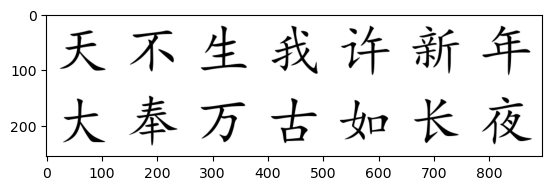

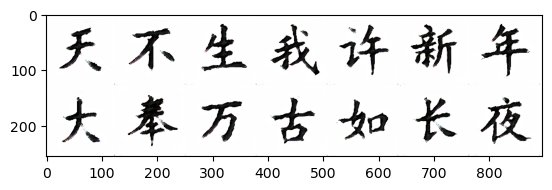

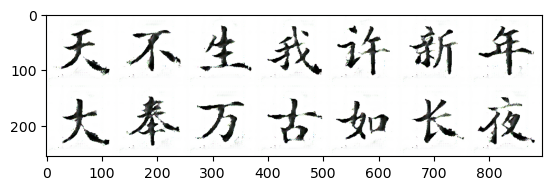

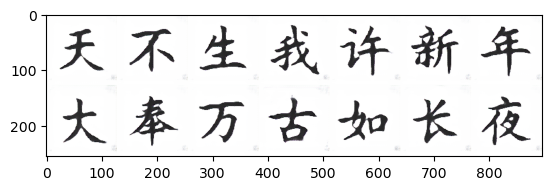

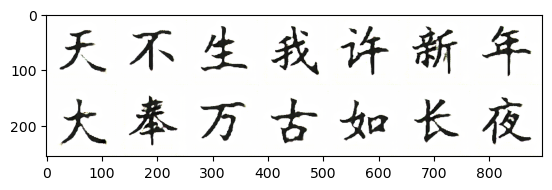

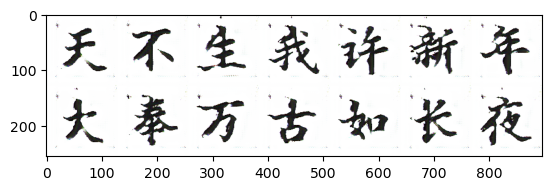

In [23]:
string = "永和九年嵗"
# string = "四體不勤五穀不分"
# string = "二简将餐简化为歺"
# string = "天不生我许新年大奉万古如长夜"

generateImages(string, gans, columns=7)

# Manual Generation

In [6]:
# generated images

orig, cvtd = getImages("四體不勤五穀不分", gans)

  0%|          | 0/5 [00:00<?, ?it/s]

Images shape: (8, 128, 128, 3)
1/1 [==============================] - 0s 320ms/step


2023-02-21 21:28:48.706826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
 20%|██        | 1/5 [00:00<00:01,  2.62it/s]

Output shape: (8, 128, 128, 3)
Images shape: (8, 128, 128, 3)
1/1 [==============================] - 1s 527ms/step


2023-02-21 21:28:49.237327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-21 21:28:49.370587: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-21 21:28:49.370644: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 23502 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2023-02-21 21:28:49.372480: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-21 21:28:49.372519: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

Output shape: (8, 128, 128, 3)
Images shape: (8, 128, 128, 3)


2023-02-21 21:28:50.227683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-21 21:28:50.539517: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-21 21:28:50.539575: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 23502 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2023-02-21 21:28:50.540438: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-21 21:28:50.540476: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

1/1 [==============================] - 4s 4s/step


 60%|██████    | 3/5 [00:04<00:03,  1.91s/it]

Output shape: (8, 128, 128, 3)
Images shape: (8, 128, 128, 3)
1/1 [==============================] - 0s 251ms/step


2023-02-21 21:28:53.217333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-21 21:28:53.283785: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-21 21:28:53.283844: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 23502 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2023-02-21 21:28:53.284981: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-21 21:28:53.285021: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

Output shape: (8, 128, 128, 3)
Images shape: (8, 128, 128, 3)
1/1 [==============================] - 0s 246ms/step


2023-02-21 21:28:53.513917: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-21 21:28:53.579076: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-21 21:28:53.579134: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 23502 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2023-02-21 21:28:53.579928: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-21 21:28:53.579966: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

Output shape: (8, 128, 128, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


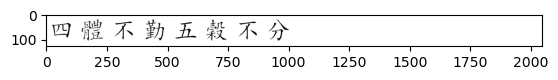

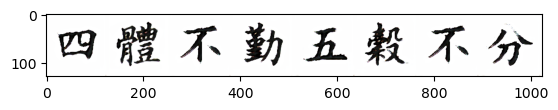

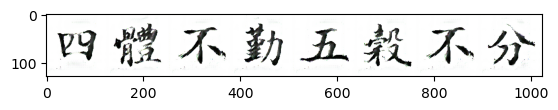

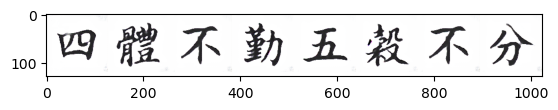

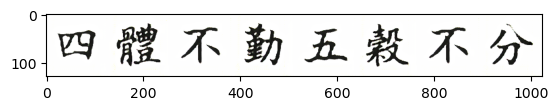

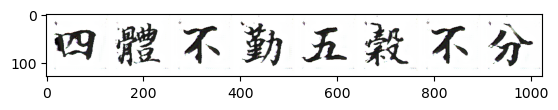

In [8]:
plt.figure()
plt.imshow(sampler.stitchImages(orig, columns=8))

for im in cvtd:
    plt.figure()
    plt.imshow(im)

In [10]:
outPath = "./images/genRuns/"

for i, im in enumerate(cvtd):
    nom = gens[i][1].split("/")[2] + ".png"
    cv2.imwrite(outPath + nom, im*255)